In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go

#for quick viz
import matplotlib.pyplot as plt
import seaborn as sns

#ml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import random

In [2]:
df = pd.read_csv('auto_insurance_csv.csv')
df.head()

Unnamed: 0  months_as_customer   age  policy_number policy_bind_date  \
0           0                 328  48.0         521585       2014-10-17   
1           1                 228  42.0         342868       2006-06-27   
2           2                 134  29.0         687698       2000-09-06   
3           3                 256  41.0         227811       1990-05-25   
4           4                 228  44.0         367455       2014-06-06   

  policy_state policy_csl  policy_deductable  policy_annual_premium  \
0           OH    250/500               1000                1406.91   
1           IN    250/500               2000                1197.22   
2           OH        NaN               2000                1413.14   
3           IL        NaN               2000                1415.74   
4           IL        NaN               1000                1583.91   

   umbrella_limit  ...  police_report_available total_claim_amount  \
0             0.0  ...                      YES              71610   
1       5000000.0  ...                        ?               5070   
2       5000000.0  ...                      NaN              34650   
3       6000000.0  ...                       NO              63400   
4       6000000.0  ...                      NaN               6500   

  injury_claim property_claim vehicle_claim  auto_make  auto_model  auto_year  \
0         6510          13020         52080       Saab         92x       2004   
1          780            780          3510   Mercedes        E400       2007   
2         7700           3850         23100      Dodge         RAM       2007   
3         6340           6340         50720  Chevrolet       Tahoe       2014   
4         1300            650          4550     Accura         RSX       2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 41 columns]

In [3]:
df.shape

(1000, 41)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   1000 non-null   int64  
 1   months_as_customer           1000 non-null   int64  
 2   age                          865 non-null    float64
 3   policy_number                1000 non-null   int64  
 4   policy_bind_date             1000 non-null   object 
 5   policy_state                 1000 non-null   object 
 6   policy_csl                   127 non-null    object 
 7   policy_deductable            1000 non-null   int64  
 8   policy_annual_premium        1000 non-null   float64
 9   umbrella_limit               802 non-null    float64
 10  insured_zip                  1000 non-null   int64  
 11  insured_sex                  1000 non-null   object 
 12  insured_education_level      1000 non-null   object 
 13  insured_occupation 

In [5]:
df.head()

Unnamed: 0  months_as_customer   age  policy_number policy_bind_date  \
0           0                 328  48.0         521585       2014-10-17   
1           1                 228  42.0         342868       2006-06-27   
2           2                 134  29.0         687698       2000-09-06   
3           3                 256  41.0         227811       1990-05-25   
4           4                 228  44.0         367455       2014-06-06   

  policy_state policy_csl  policy_deductable  policy_annual_premium  \
0           OH    250/500               1000                1406.91   
1           IN    250/500               2000                1197.22   
2           OH        NaN               2000                1413.14   
3           IL        NaN               2000                1415.74   
4           IL        NaN               1000                1583.91   

   umbrella_limit  ...  police_report_available total_claim_amount  \
0             0.0  ...                      YES              71610   
1       5000000.0  ...                        ?               5070   
2       5000000.0  ...                      NaN              34650   
3       6000000.0  ...                       NO              63400   
4       6000000.0  ...                      NaN               6500   

  injury_claim property_claim vehicle_claim  auto_make  auto_model  auto_year  \
0         6510          13020         52080       Saab         92x       2004   
1          780            780          3510   Mercedes        E400       2007   
2         7700           3850         23100      Dodge         RAM       2007   
3         6340           6340         50720  Chevrolet       Tahoe       2014   
4         1300            650          4550     Accura         RSX       2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 41 columns]

In [6]:
df.describe()

Unnamed: 0  months_as_customer         age  policy_number  \
count  1000.000000         1000.000000  865.000000    1000.000000   
mean    499.500000          203.954000   38.812717  546238.648000   
std     288.819436          115.113174    9.123361  257063.005276   
min       0.000000            0.000000   19.000000  100804.000000   
25%     249.750000          115.750000   32.000000  335980.250000   
50%     499.500000          199.500000   38.000000  533135.000000   
75%     749.250000          276.250000   44.000000  759099.750000   
max     999.000000          479.000000   64.000000  999435.000000   

       policy_deductable  policy_annual_premium  umbrella_limit  \
count        1000.000000            1000.000000    8.020000e+02   
mean         1136.000000            1256.406150    1.103491e+06   
std           611.864673             244.167395    2.299218e+06   
min           500.000000             433.330000   -1.000000e+06   
25%           500.000000            1089.607500    0.000000e+00   
50%          1000.000000            1257.200000    0.000000e+00   
75%          2000.000000            1415.695000    0.000000e+00   
max          2000.000000            2047.590000    9.000000e+06   

         insured_zip  capital-gains   capital-loss  incident_hour_of_the_day  \
count    1000.000000    1000.000000    1000.000000               1000.000000   
mean   501214.488000   25126.100000  -26793.700000                 11.644000   
std     71701.610941   27872.187708   28104.096686                  6.951373   
min    430104.000000       0.000000 -111100.000000                  0.000000   
25%    448404.500000       0.000000  -51500.000000                  6.000000   
50%    466445.500000       0.000000  -23250.000000                 12.000000   
75%    603251.000000   51025.000000       0.000000                 17.000000   
max    620962.000000  100500.000000       0.000000                 23.000000   

       number_of_vehicles_involved  bodily_injuries    witnesses  \
count                   1000.00000      1000.000000  1000.000000   
mean                       1.83900         0.992000     1.487000   
std                        1.01888         0.820127     1.111335   
min                        1.00000         0.000000     0.000000   
25%                        1.00000         0.000000     1.000000   
50%                        1.00000         1.000000     1.000000   
75%                        3.00000         2.000000     2.000000   
max                        4.00000         2.000000     3.000000   

       total_claim_amount  injury_claim  property_claim  vehicle_claim  \
count          1000.00000   1000.000000     1000.000000    1000.000000   
mean          52761.94000   7433.420000     7399.570000   37928.950000   
std           26401.53319   4880.951853     4824.726179   18886.252893   
min             100.00000      0.000000        0.000000      70.000000   
25%           41812.50000   4295.000000     4445.000000   30292.500000   
50%           58055.00000   6775.000000     6750.000000   42100.000000   
75%           70592.50000  11305.000000    10885.000000   50822.500000   
max          114920.00000  21450.000000    23670.000000   79560.000000   

         auto_year  _c39  
count  1000.000000   0.0  
mean   2005.103000   NaN  
std       6.015861   NaN  
min    1995.000000   NaN  
25%    2000.000000   NaN  
50%    2005.000000   NaN  
75%    2010.000000   NaN  
max    2015.000000   NaN

In [7]:
#Percentage of null values in each column
col_with_nullvalues=df.isnull().sum()/len(df)*100
col_with_nullvalues.sort_values(ascending=False)

_c39                           100.0
policy_csl                      87.3
police_report_available         25.0
umbrella_limit                  19.8
age                             13.5
insured_sex                      0.0
capital-loss                     0.0
capital-gains                    0.0
insured_relationship             0.0
insured_hobbies                  0.0
insured_occupation               0.0
insured_education_level          0.0
policy_annual_premium            0.0
insured_zip                      0.0
incident_type                    0.0
policy_deductable                0.0
policy_state                     0.0
policy_bind_date                 0.0
policy_number                    0.0
months_as_customer               0.0
incident_date                    0.0
collision_type                   0.0
fraud_reported                   0.0
witnesses                        0.0
auto_year                        0.0
auto_model                       0.0
auto_make                        0.0
v

In [8]:
# List the columns having more than 80% missing values
nullvalues_80=col_with_nullvalues[col_with_nullvalues.values>80.0].sort_values(ascending=False)
nullvalues_80

_c39          100.0
policy_csl     87.3
dtype: float64

In [9]:
df = df.drop(['_c39','Unnamed: 0','policy_csl'], axis = 1)

In [10]:
df.shape

(1000, 38)

In [11]:
df.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

months_as_customer              391
policy_number                  1000
policy_deductable                 3
insured_zip                     995
capital-gains                   338
capital-loss                    354
incident_hour_of_the_day         24
number_of_vehicles_involved       4
bodily_injuries                   3
witnesses                         4
total_claim_amount              763
injury_claim                    638
property_claim                  626
vehicle_claim                   726
auto_year                        21
dtype: int64

In [12]:
#columnların count, size ve unique değerlerine bakalım
df.agg(['count','size','nunique'])

months_as_customer   age  policy_number  policy_bind_date  \
count                  1000   865           1000              1000   
size                   1000  1000           1000              1000   
nunique                 391    46           1000               951   

         policy_state  policy_deductable  policy_annual_premium  \
count            1000               1000                   1000   
size             1000               1000                   1000   
nunique             3                  3                    991   

         umbrella_limit  insured_zip  insured_sex  ...  witnesses  \
count               802         1000         1000  ...       1000   
size               1000         1000         1000  ...       1000   
nunique              10          995            2  ...          4   

         police_report_available  total_claim_amount  injury_claim  \
count                        750                1000          1000   
size                        1000                1000          1000   
nunique                        3                 763           638   

         property_claim  vehicle_claim  auto_make  auto_model  auto_year  \
count              1000           1000       1000        1000       1000   
size               1000           1000       1000        1000       1000   
nunique             626            726         14          39         21   

         fraud_reported  
count              1000  
size               1000  
nunique               2  

[3 rows x 38 columns]

In [13]:
#target değişkenimizin dağılımına bakalım
defaulters=df[df.fraud_reported=='Y']
nondefaulters=df[df.fraud_reported=='N']

In [14]:
#dağılım yüzdelerini kontrol edelim
percentage_defaulters=(len(defaulters)*100)/len(df)
percentage_defaulters

24.7

In [15]:
percentage_nondefaulters=(len(nondefaulters)*100)/len(df)
percentage_nondefaulters

75.3

/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


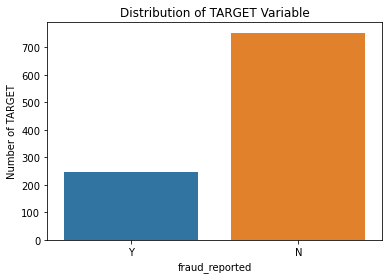

In [16]:
sns.countplot(df.fraud_reported)
plt.xlabel("fraud_reported")
plt.ylabel("Number of TARGET")
plt.title("Distribution of TARGET Variable")
plt.show()

 * beklediğimiz gibi imbalance bir target olduğunu görüyoruz.

In [17]:
df['fraud_reported'] = df['fraud_reported'].str.replace('Y', '1')
df['fraud_reported'] = df['fraud_reported'].str.replace('N', '0')
df['fraud_reported'] = df['fraud_reported'].astype(int)

In [18]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['claim_day_of_policy'] = (df.incident_date -  df.policy_bind_date).dt.days

# Categorical Analysis

In [19]:
def vis_data(df, x, y = 'fraud_reported', graph = 'countplot'):
    if graph == 'hist':
        fig = px.histogram(df, x = x)
        fig.update_layout(title = 'Distribution of {x}'.format(x = x))
        fig.show()
    elif graph == 'bar':
      fig = px.bar(df, x = x, y = y)
      fig.update_layout(title = '{x} vs. {y}'.format(x = x, y = y))
      fig.show()
    elif graph == 'countplot':
      a = df.groupby([x,y]).count()
      a.reset_index(inplace = True)
      no_fraud = a[a['fraud_reported'] == 0]
      yes_fraud = a[a['fraud_reported'] == 1]
      trace1 = go.Bar(x = no_fraud[x], y = no_fraud['policy_number'], name = 'No Fraud')
      trace2 = go.Bar(x = yes_fraud[x], y = yes_fraud['policy_number'], name = 'Fraud')
      fig = go.Figure(data = [trace1, trace2])
      fig.update_layout(title = '{x} vs. {y}'.format(x=x, y = y))
      fig.update_layout(barmode = 'group')
      fig.show()

* kategorik değerlerimizi görselleştirelim.

In [20]:
cat_cols = df.select_dtypes(include='object')

for feature in cat_cols:
    vis_data(df, feature)

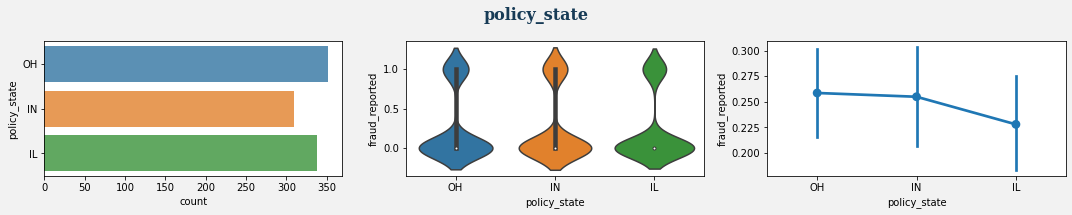

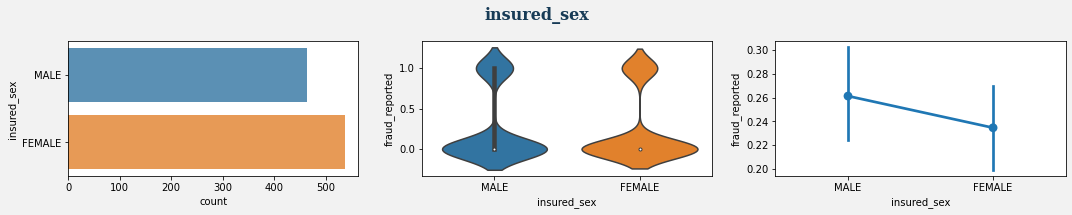

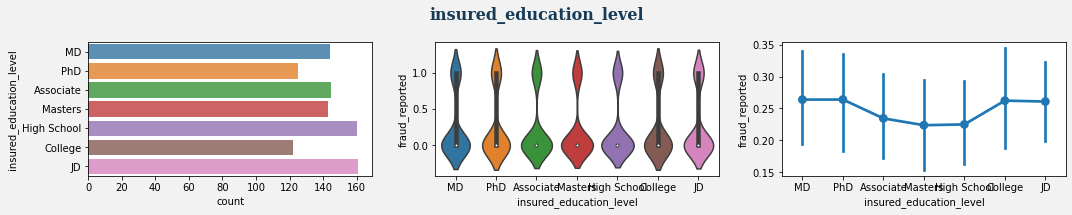

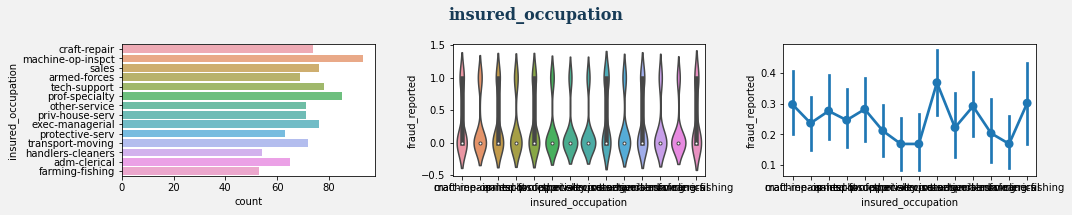

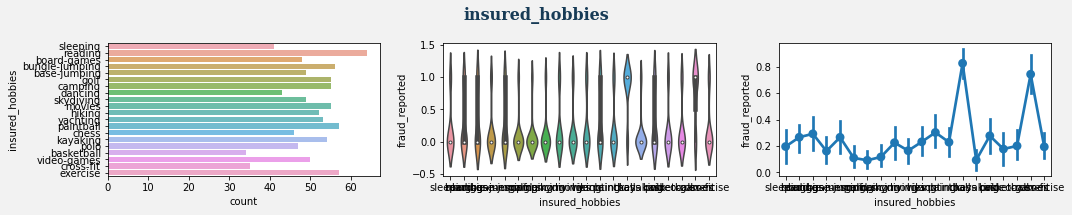

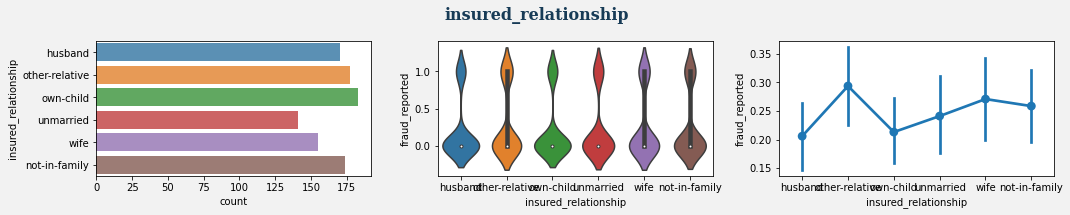

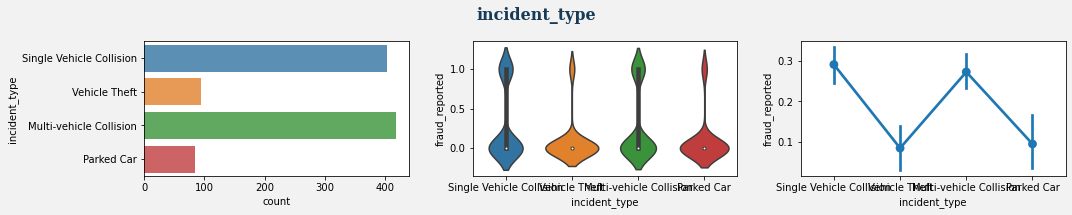

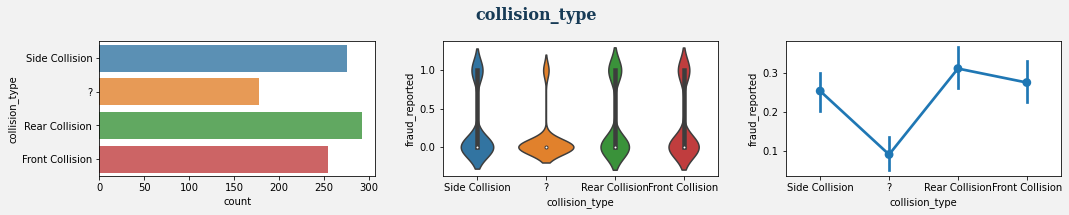

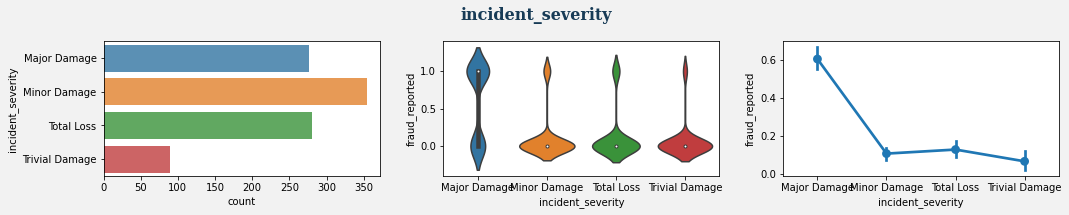

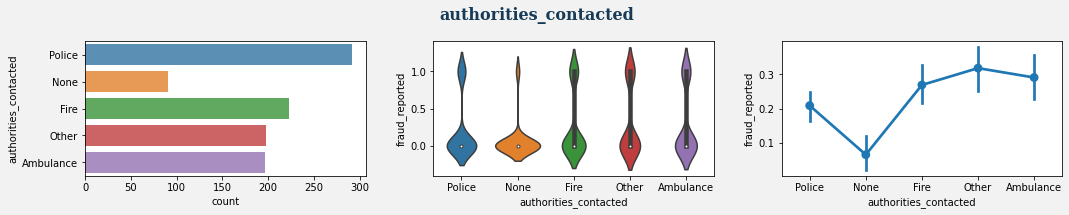

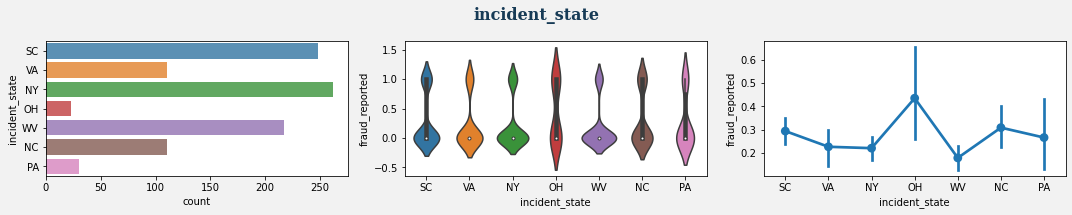

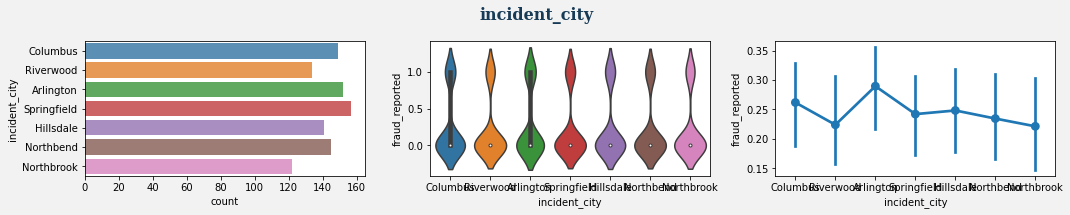

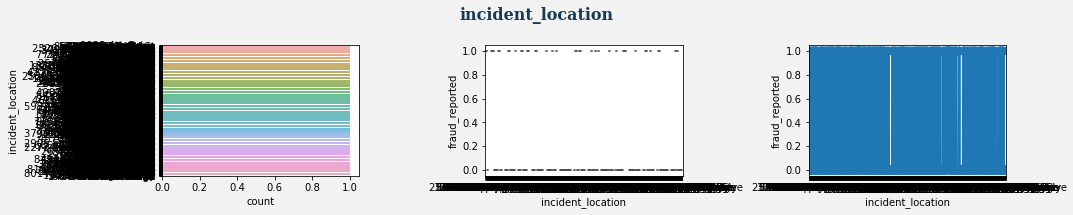

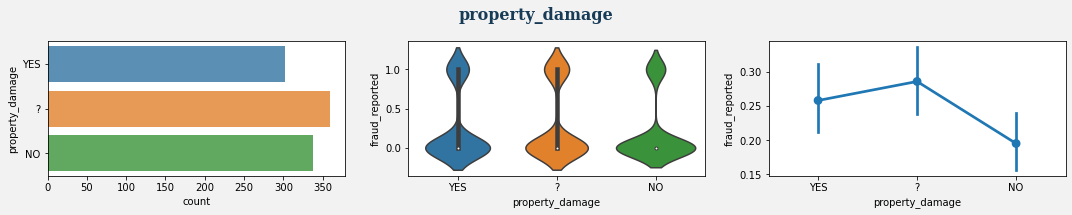

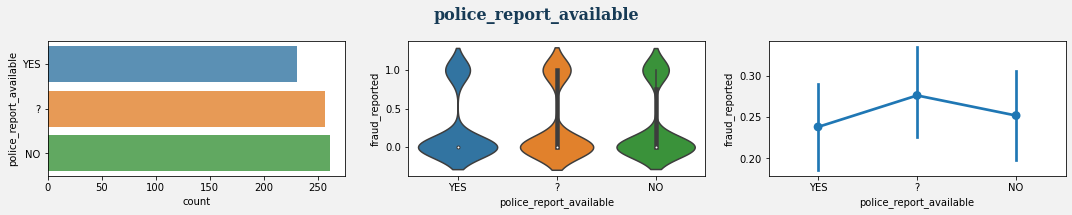

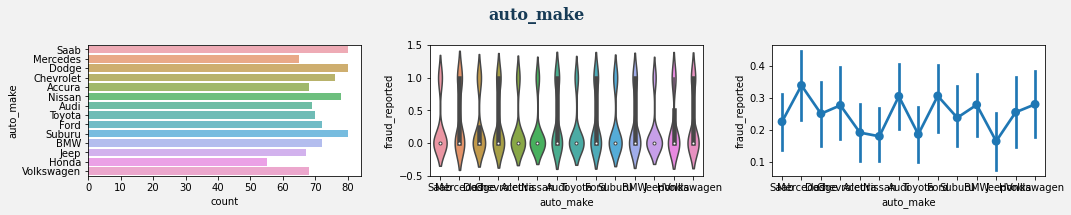

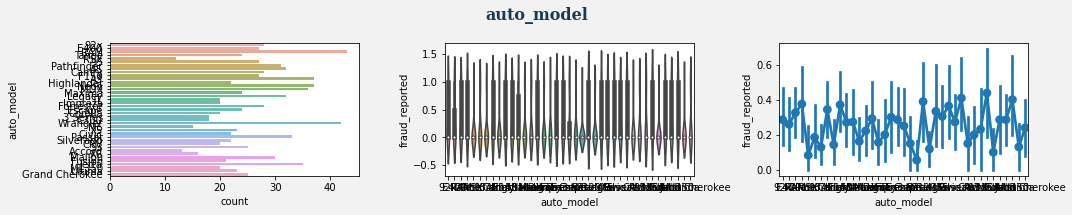

In [21]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
for feature in cat_cols:
    fig, ax = plt.subplots(1,3, figsize=(15,3))
    fig.patch.set_facecolor('#F2F2F2')

    sns.countplot(y=feature, data=df, alpha=0.8, ax=ax[0])
    sns.violinplot(y='fraud_reported', x=feature, data=df, ax=ax[1])
    sns.pointplot(y='fraud_reported', x=feature, data=df, ax=ax[2])

    plt.suptitle(feature, fontfamily='serif', fontsize=16, color='#173b56', fontweight='bold')
    plt.tight_layout()
    plt.show()


In [22]:
hobbies = df['insured_hobbies'].unique()
for hobby in hobbies:
    if (hobby != 'chess') and (hobby != 'cross-fit'):
        df['insured_hobbies'] = df['insured_hobbies'].str.replace(hobby, 'Other')

* insured_hobbies dağılımlarına baktığımızda fraud detection oranını yüksek olan gözlemlediğimiz chess ve cross-fit'i seçelim. diğer tüm hobbies other olarak gruplandıralım.

In [23]:
def group_incident_state(i):
    if i in ('OH'):
        return 'HighIncidentState'
    elif i in ('SC','NC','PA'):
        return 'MidIncidentState'
    else:
        return 'LowIncidentState'
df['incident_state'] = df['incident_state'].apply(group_incident_state)

* incident_state'i High, Mid ve Low Fraud Detection olarak gruplandırabiliriz.

In [24]:
incidenttypes = df['incident_type'].unique()
for incidenttype in incidenttypes:
    if (incidenttype != 'Multi-vehicle Collision') and (incidenttype != 'Single Vehicle Collision'):
        df['incident_type'] = df['incident_type'].str.replace(incidenttype, 'HighIncidentType')

* incident types'ta Multi-vehicle Collision ve Single Vehicle Collision haricindeki tüm typeları High olarak gruplandırdık.

In [25]:
incidentseveritys = df['incident_severity'].unique()
for incidentseverity in incidentseveritys:
    if (incidentseverity != 'Major Damage'):
        df['incident_severity'] = df['incident_severity'].str.replace(incidentseverity, 'Other')

In [26]:
authoritiescontacteds = df['authorities_contacted'].unique()
for authoritiescontacted in authoritiescontacteds:
    if (authoritiescontacted != 'Police') and (authoritiescontacted != 'None'):
        df['authorities_contacted'] = df['authorities_contacted'].str.replace(authoritiescontacted, 'Other')

In [27]:
def group_insured_education_level(i):
    if i in ('MD','PHD'):
        return 'HighInsuredEducationLevel'
    elif i in ('College','JD'):
        return 'MidInsuredEducationLevel'
    else:
        return 'LowInsuredEducationLevel'
df['insured_education_level'] = df['insured_education_level'].apply(group_insured_education_level)

In [28]:
def group_insured_occupation(i):
    if i in ('adm-clerical','other-service','priv-house-serv'):
        return 'LowInsuredOccupation'
    elif i in ('armed-forces','handlers-cleaners','machine-op-inspct','prof-speciality','protective-serv'):
        return 'MidInsuredOccupation'
    else:
        return 'HighInsuredOccupation'
df['insured_occupation'] = df['insured_occupation'].apply(group_insured_occupation)

In [29]:
autobrands = df['auto_make'].unique()
for autobrand in autobrands:
    if (autobrand == 'Accura') or (autobrand == 'Jeep') or (autobrand == 'Toyota') or (autobrand == 'Nissan'):
        df['auto_make'] = df['auto_make'].str.replace(autobrand, 'LowAutoBrands')

In [30]:
df.groupby(['auto_make']).agg({'policy_number': 'count'})

policy_number
auto_make                   
Audi                      69
BMW                       72
Chevrolet                 76
Dodge                     80
Ford                      72
Honda                     55
LowAutoBrands            283
Mercedes                  65
Saab                      80
Suburu                    80
Volkswagen                68

In [31]:
automodels = df['auto_model'].unique()
for automodel in automodels:
    if (automodel != '3 Series') and (automodel != 'RSX') and (automodel != 'Malibu') and (automodel != 'X6') and (automodel != 'Silverado') and (automodel != 'C300') and (automodel != 'Civic') and (automodel != 'F150') and (automodel != 'ML350'):
        df['auto_model'] = df['auto_model'].str.replace(automodel, 'MidAutoModels')

In [32]:
df.groupby(['auto_model']).agg({'policy_number': 'count'})

policy_number
auto_model                  
3 Series                  18
C300                      18
Civic                     22
F150                      27
ML350                     20
Malibu                    30
MidAutoModels            815
RSX                       12
Silverado                 22
X6                        16

In [33]:
df.groupby(['incident_location']).agg({'policy_number': 'count'})

policy_number
incident_location               
1012 5th Lane                  1
1028 Sky Lane                  1
1030 Pine Lane                 1
1087 Flute Drive               1
1091 1st Drive                 1
...                          ...
9929 Rock Drive                1
9935 4th Drive                 1
9942 Tree Ave                  1
9980 Lincoln Ave               1
9988 Rock Ridge                1

[1000 rows x 1 columns]

* Incident Location'da çok fazla unique değerden dolayı model overfite gidebilir, oluşturulan decision treenin dallarını gereksiz olarak alır, 
* Drop edelim çünkü o değer büyük ihtimalle bir daha benim karşıma gelmeyecek.

In [34]:
df = df.drop(['incident_location'], axis = 1)

In [35]:
df.shape

(1000, 38)

In [36]:
# İşlemlerin ardından, categorical değikenlerimdeki unique değer sayıları
for i in df.columns:
    if df[i].dtype == 'object':
        print(i, ":", df[i].nunique())

policy_state : 3
insured_sex : 2
insured_education_level : 3
insured_occupation : 3
insured_hobbies : 3
insured_relationship : 6
incident_type : 3
collision_type : 4
incident_severity : 2
authorities_contacted : 3
incident_state : 3
incident_city : 7
property_damage : 3
police_report_available : 3
auto_make : 11
auto_model : 10


# Numerical Analysis

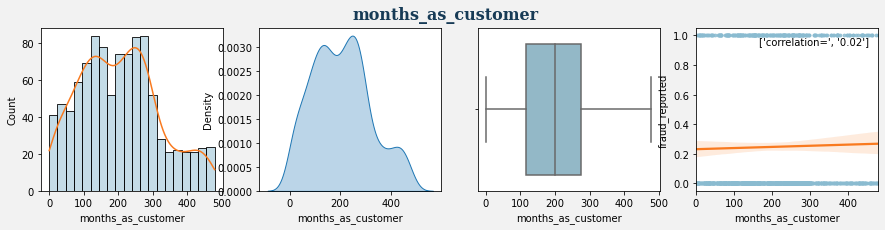

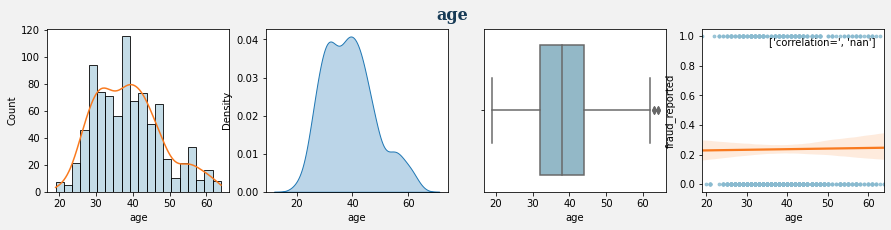

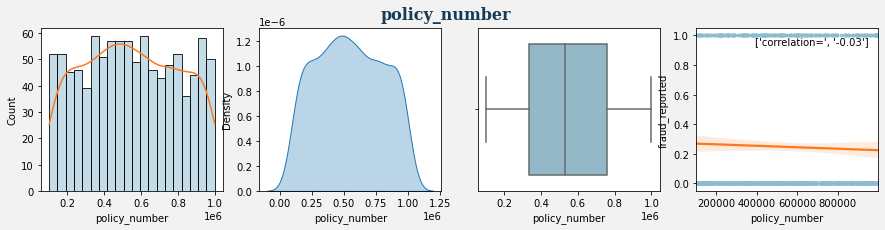

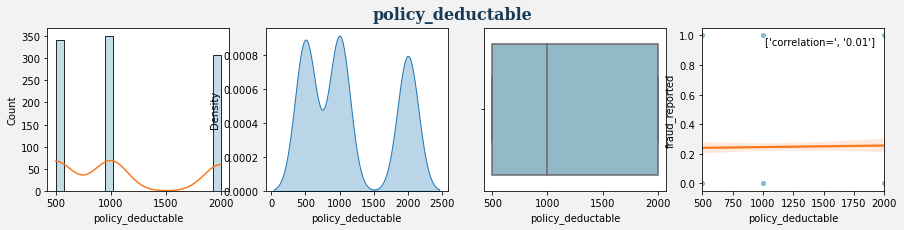

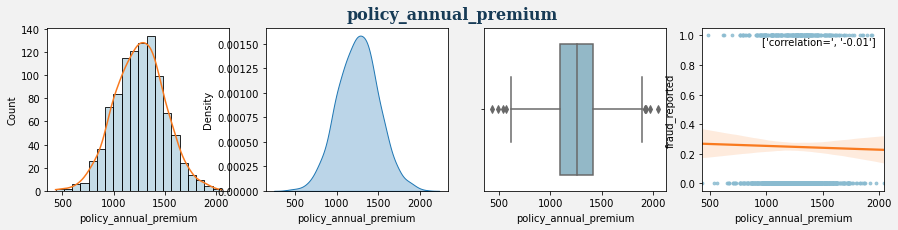

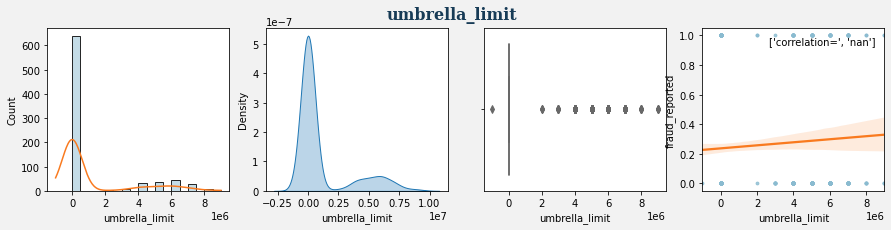

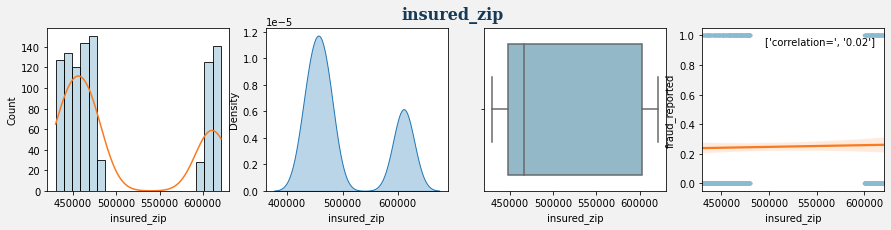

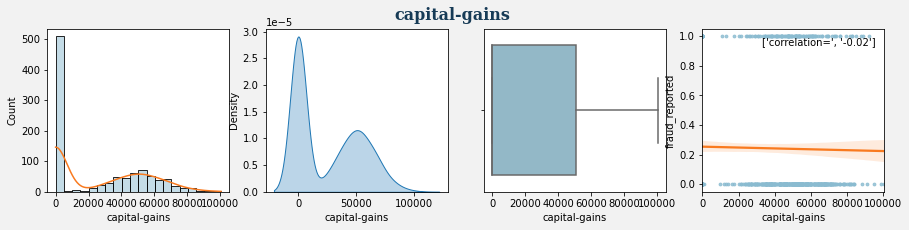

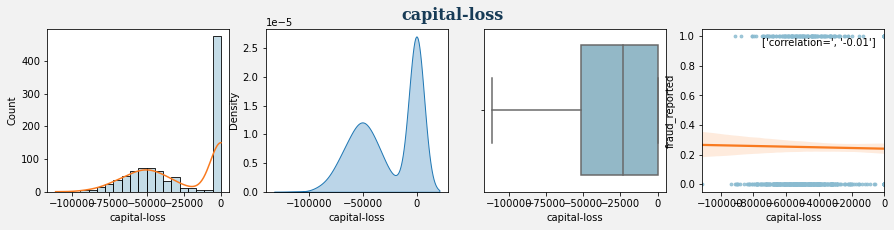

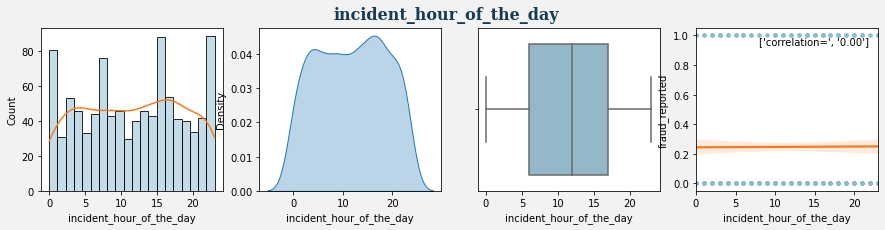

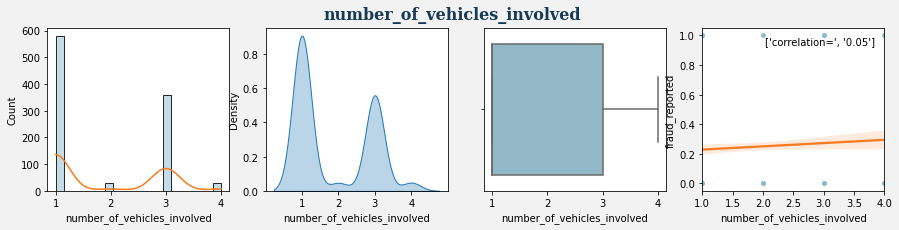

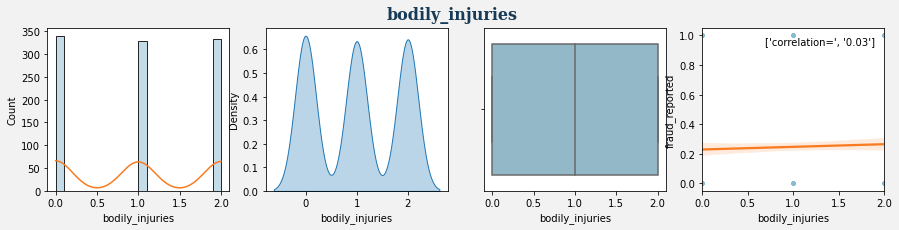

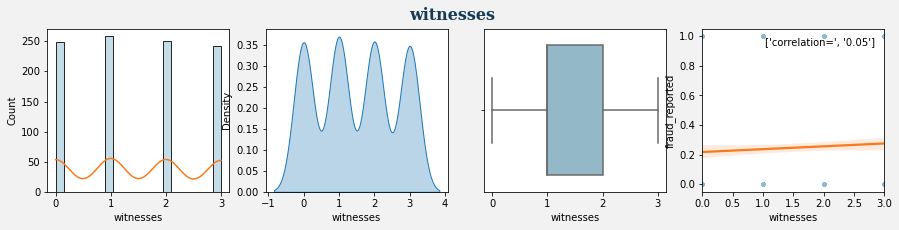

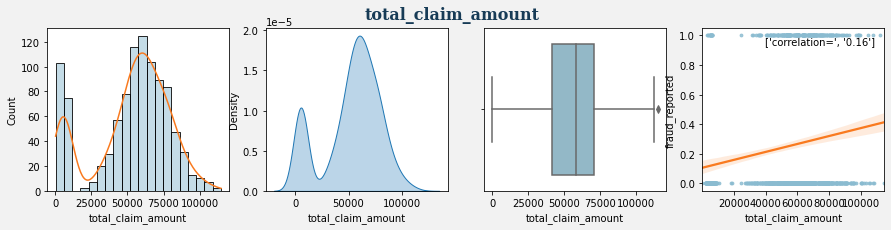

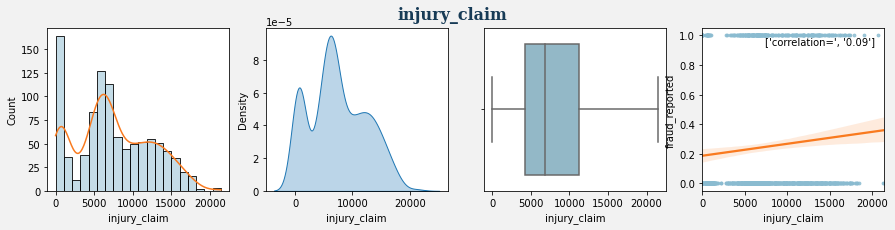

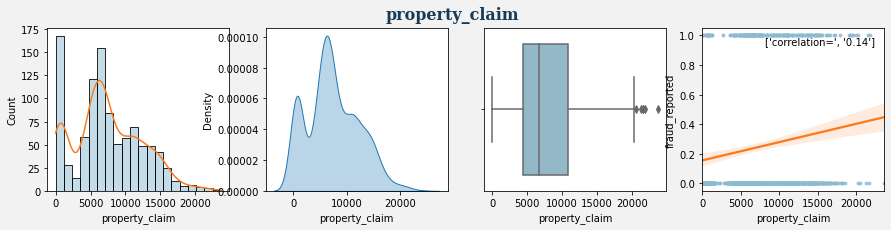

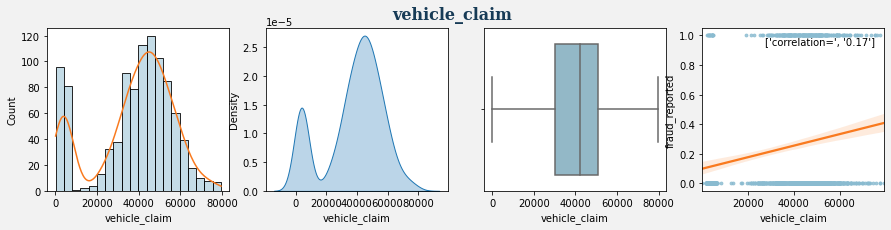

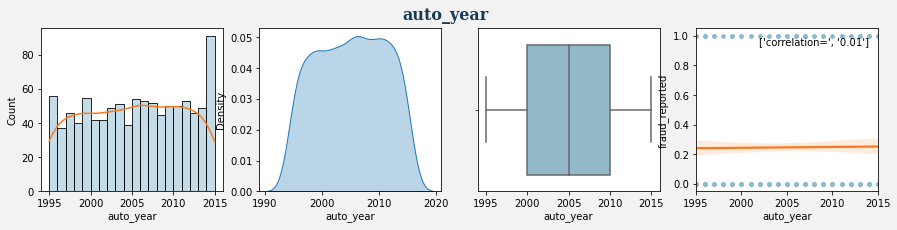

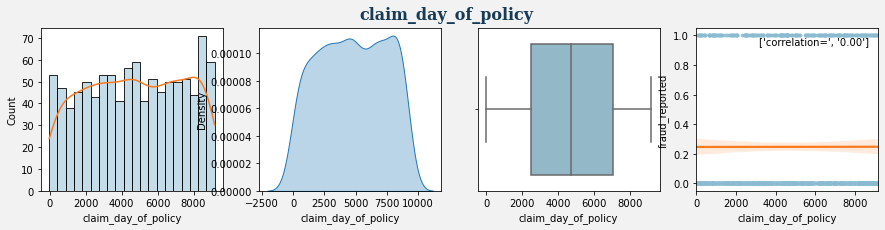

In [37]:
num_cols = df.select_dtypes(exclude='object').columns.tolist()
num_cols = [e for e in num_cols if e not in ['policy_bind_date', 'incident_date','fraud_reported']]

color ='#8abbd0'
for feature in num_cols:
    fig, ax = plt.subplots(1,4, figsize=(15,3))
    fig.patch.set_facecolor( '#F2F2F2')
    sns.histplot(df[feature], bins=20, ax=ax[0],  color=color, kde=True)
    ax[0].lines[0].set_color('#F97A1F')
    sns.kdeplot(x=feature,data=df,ax=ax[1],shade=True, alpha=0.3)
    sns.boxplot(x=feature, data=df,ax=ax[2], color=color)

    sns.regplot(x=feature, y='fraud_reported', data=df, ax=ax[3], color=color, scatter_kws={"s": 8}, line_kws={'color':'#F97A1F'})
    correlation = np.corrcoef(df['fraud_reported'], df[feature])[0][1]
    ax[3].text(x=0.95, y=0.9, 
               s = ['correlation=', "{:.2f}".format(correlation)], 
               ha='right', transform=ax[3].transAxes)

    plt.suptitle(feature, fontfamily='serif', fontsize=16, color='#173b56', fontweight='bold')
    plt.show()

In [38]:
num_cols

['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 'claim_day_of_policy']

In [39]:
#sayısal değerlerin count, size ve uniqye değerlerine bakalım.
df.select_dtypes(exclude='object').agg(['count','size','nunique'])

months_as_customer   age  policy_number  policy_bind_date  \
count                  1000   865           1000              1000   
size                   1000  1000           1000              1000   
nunique                 391    46           1000               951   

         policy_deductable  policy_annual_premium  umbrella_limit  \
count                 1000                   1000             802   
size                  1000                   1000            1000   
nunique                  3                    991              10   

         insured_zip  capital-gains  capital-loss  ...  \
count           1000           1000          1000  ...   
size            1000           1000          1000  ...   
nunique          995            338           354  ...   

         number_of_vehicles_involved  bodily_injuries  witnesses  \
count                           1000             1000       1000   
size                            1000             1000       1000   
nunique                            4                3          4   

         total_claim_amount  injury_claim  property_claim  vehicle_claim  \
count                  1000          1000            1000           1000   
size                   1000          1000            1000           1000   
nunique                 763           638             626            726   

         auto_year  fraud_reported  claim_day_of_policy  
count         1000            1000                 1000  
size          1000            1000                 1000  
nunique         21               2                  953  

[3 rows x 22 columns]


* age, claim_day_of_policy, total_claim_amount, capital_loss, capital_gains gibi columları dağılımlarına göre gruplayalım, çok fazla unique değer içeren ve sürekli olan değişkenle modelimi train etmek istemiyorum.

In [40]:
df['months_as_customer'].describe()

count    1000.000000
mean      203.954000
std       115.113174
min         0.000000
25%       115.750000
50%       199.500000
75%       276.250000
max       479.000000
Name: months_as_customer, dtype: float64

In [41]:
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
bin_labels = ['0-50','51-100','101-150','151-200','201-250','251-300','301-350','351-400','401-450','451-500']

df['months_as_customer_groups'] = pd.cut(df['months_as_customer'], bins = 10, labels = bin_labels, include_lowest= True)

In [42]:
vis_data(df, 'months_as_customer_groups')

In [43]:
df['age'].describe()

count    865.000000
mean      38.812717
std        9.123361
min       19.000000
25%       32.000000
50%       38.000000
75%       44.000000
max       64.000000
Name: age, dtype: float64

* mean ve medianı benzer olduğu için na değerleri mean ile dolduralım.

In [44]:
df['age'] = df['age'].fillna(df['age'].mean())

In [45]:
bins = [0,18, 30, 40, 50, 60, 70, 120]
labels = ['0-17','18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

print (df['AgeGroup'])

0      40-49
1      40-49
2      18-29
3      40-49
4      40-49
       ...  
995    30-39
996    40-49
997    30-39
998    60-69
999    60-69
Name: AgeGroup, Length: 1000, dtype: category
Categories (7, object): ['0-17' < '18-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70+']


In [46]:
vis_data(df, 'AgeGroup')

In [47]:
df['policy_bind_date']

0     2014-10-17
1     2006-06-27
2     2000-09-06
3     1990-05-25
4     2014-06-06
         ...    
995   1991-07-16
996   2014-01-05
997   2003-02-17
998   2011-11-18
999   1996-11-11
Name: policy_bind_date, Length: 1000, dtype: datetime64[ns]

* policy_bind_date'i içerdiği datetime ögelerine ayıralım.

In [48]:
df["policy_bind_Day"] = pd.to_datetime(df['policy_bind_date']).dt.day_name()
df["policy_bind_Month"] = pd.to_datetime(df['policy_bind_date']).dt.month
df["policy_bind_Year"] = pd.to_datetime(df['policy_bind_date']).dt.year


In [49]:
df["policy_bind_Year"].unique()

array([2014, 2006, 2000, 1990, 1997, 2011, 2002, 1999, 2012, 1998, 1992,
       2005, 2004, 1994, 1991, 1996, 2013, 2008, 2003, 2010, 1993, 1995,
       2007, 2001, 2009, 2015])

In [50]:
df["policy_bind_Month"].unique()

array([10,  6,  9,  5,  2,  7, 11, 12,  8,  3,  4,  1])

In [51]:
df["policy_bind_Day"].unique()

array(['Friday', 'Tuesday', 'Wednesday', 'Thursday', 'Sunday', 'Saturday',
       'Monday'], dtype=object)

In [52]:
df['policy_annual_premium'].describe()

count    1000.000000
mean     1256.406150
std       244.167395
min       433.330000
25%      1089.607500
50%      1257.200000
75%      1415.695000
max      2047.590000
Name: policy_annual_premium, dtype: float64

In [53]:
bins = [400, 600, 800, 1000, 1200, 1400, 1600, 1800]
bin_labels = ['400-599','600-799','800-999','1000-1199','1200-1399','1400-1599','1600-1799','1800+']

df['policy_annual_premium_groups'] = pd.cut(df['policy_annual_premium'], bins = 8, labels = bin_labels, include_lowest= True)

In [54]:
df['policy_annual_premium_groups']

0      1200-1399
1      1000-1199
2      1200-1399
3      1200-1399
4      1400-1599
         ...    
995    1200-1399
996    1200-1399
997    1200-1399
998    1200-1399
999      600-799
Name: policy_annual_premium_groups, Length: 1000, dtype: category
Categories (8, object): ['400-599' < '600-799' < '800-999' < '1000-1199' < '1200-1399' < '1400-1599' < '1600-1799' < '1800+']

In [55]:
vis_data(df, 'policy_annual_premium_groups')

In [56]:
df['umbrella_limit'] = df.umbrella_limit.astype(str)
vis_data(df, 'umbrella_limit')

In [57]:
df['umbrella_limit'].describe()

count     1000
unique      11
top        0.0
freq       640
Name: umbrella_limit, dtype: object

In [58]:
df['umbrella_limit'].fillna(random.random())

0            0.0
1      5000000.0
2      5000000.0
3      6000000.0
4      6000000.0
         ...    
995          0.0
996          nan
997    3000000.0
998          nan
999          0.0
Name: umbrella_limit, Length: 1000, dtype: object

In [59]:
df['umbrella_limit'].isnull().sum()

0

In [60]:
umbrealla = df['umbrella_limit'].unique()
for umb in umbrealla:
  if (umb != '0.0') & (umb != 'nan'):
    df['umbrella_limit'] = df['umbrella_limit'].str.replace(umb, 'other')

df['umbrella_limit'].unique()

array(['0.0', 'other', 'nan'], dtype=object)

In [61]:
vis_data(df, 'umbrella_limit')

In [62]:
vis_data(df, 'insured_zip')

* insured_zip kolonu fraud detectionda bir anlam ifade etmiyor gibi drop edelim.

In [63]:
df['capital-gains'].describe()

count      1000.000000
mean      25126.100000
std       27872.187708
min           0.000000
25%           0.000000
50%           0.000000
75%       51025.000000
max      100500.000000
Name: capital-gains, dtype: float64

In [64]:
capitalgains= df['capital-gains'].unique()

In [65]:
bins = [0,50000, 20000, 35000, 70000, 85000, 100000]
bin_labels = ['0-4999','5000-19999','20000-34999','35000-69999','70000-84999','85000+']

df['capital-gains'] = pd.cut(df['capital-gains'], bins = 6, labels = bin_labels, include_lowest= True)

In [66]:
vis_data(df, 'capital-gains')

In [67]:
df['capital-loss'].describe()

count      1000.000000
mean     -26793.700000
std       28104.096686
min     -111100.000000
25%      -51500.000000
50%      -23250.000000
75%           0.000000
max           0.000000
Name: capital-loss, dtype: float64

In [68]:
bins = [-100000,-95.000, -75000, -55000, -40000, -30000, 0]
bin_labels = ['-100000-95001','-95000-75001','-75000-55001','-55000-40001','-40000-30001','-3000-1','0']

df['capital-loss'] = pd.cut(df['capital-loss'], bins = 7, labels = bin_labels, include_lowest= True)

In [69]:
vis_data(df, 'capital-loss')

In [70]:
bins = [-500,0,9000]
bin_labels = ['-500-1','0-8999','9000+']

df['claim_day_of_policy'] = pd.cut(df['claim_day_of_policy'], bins = 3, labels = bin_labels, include_lowest= True)

In [71]:
vis_data(df, 'claim_day_of_policy')

In [72]:
df['total_claim_amount'].describe()

count      1000.00000
mean      52761.94000
std       26401.53319
min         100.00000
25%       41812.50000
50%       58055.00000
75%       70592.50000
max      114920.00000
Name: total_claim_amount, dtype: float64

In [73]:
bins = [0,5000, 10000, 40000, 50000, 65000, 80000,100000]
bin_labels = ['0-4999','5000-9999','10000-39999','40000-49999','50000-64999','65000-79999','80000-999999','100000+']

df['total_claim_amount'] = pd.cut(df['total_claim_amount'], bins = 8, labels = bin_labels, include_lowest= True)

In [74]:
vis_data(df, 'total_claim_amount')

* policy_number datam için hiçbirşey ifade etmiyor, unique bir değerdi zaten drop edelim.
* group olarak oluşturduğumuz columnları da drop edelim.

In [75]:
df = df.drop(['months_as_customer', 'policy_bind_date','policy_annual_premium', 'age', 'insured_zip'], axis = 1)

In [76]:
df.shape

(1000, 39)

In [77]:
df.columns

Index(['policy_number', 'policy_state', 'policy_deductable', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_date', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'claim_day_of_policy',
       'months_as_customer_groups', 'AgeGroup', 'policy_bind_Day',
       'policy_bind_Month', 'policy_bind_Year',
       'policy_annual_premium_groups'],
      dtype='object')

In [78]:
required_columns = ['policy_number', 'policy_state', 'policy_deductable', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_date', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'claim_day_of_policy',
       'months_as_customer_groups', 'AgeGroup', 'policy_bind_Day',
       'policy_bind_Month', 'policy_bind_Year',
       'policy_annual_premium_groups']
                    

print(len(required_columns))
print(len(df.columns))

39
39


In [79]:
df1 = df[required_columns]

corr_matrix = df1.corr()

fig = go.Figure(data = go.Heatmap(
                                z = corr_matrix.values,
                                x = list(corr_matrix.columns),
                                y = list(corr_matrix.index)))

fig.update_layout(title = 'Correlation')

fig.show()

In [80]:
t = df['total_claim_amount'].iloc[1]
a = df['vehicle_claim'].iloc[1]
b = df['property_claim'].iloc[1]
c = df['injury_claim'].iloc[1]

print(t)
a+b+c

0-4999


5070

* injury_claim, property_claim, vehicle_claim kolonları toplamı total_claim_amount kolonuna eşit, drop edelim.

In [81]:
required_columns = ['policy_number', 'policy_state', 'policy_deductable', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_date', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'claim_day_of_policy',
       'months_as_customer_groups', 'AgeGroup', 'policy_bind_Day',
       'policy_bind_Month', 'policy_bind_Year',
       'policy_annual_premium_groups']

print(len(required_columns))

36


In [82]:
df1 = df1[required_columns]
df1.head()

policy_number policy_state  policy_deductable umbrella_limit insured_sex  \
0         521585           OH               1000            0.0        MALE   
1         342868           IN               2000          other        MALE   
2         687698           OH               2000          other      FEMALE   
3         227811           IL               2000          other      FEMALE   
4         367455           IL               1000          other        MALE   

     insured_education_level     insured_occupation insured_hobbies  \
0  HighInsuredEducationLevel  HighInsuredOccupation           Other   
1  HighInsuredEducationLevel   MidInsuredOccupation           Other   
2   LowInsuredEducationLevel  HighInsuredOccupation           Other   
3   LowInsuredEducationLevel   MidInsuredOccupation           Other   
4   LowInsuredEducationLevel  HighInsuredOccupation           Other   

  insured_relationship capital-gains  ...     auto_model auto_year  \
0              husband   35000-69999  ...  MidAutoModels      2004   
1       other-relative        0-4999  ...  MidAutoModels      2007   
2            own-child   20000-34999  ...  MidAutoModels      2007   
3            unmarried   20000-34999  ...  MidAutoModels      2014   
4            unmarried   35000-69999  ...            RSX      2009   

  fraud_reported claim_day_of_policy months_as_customer_groups AgeGroup  \
0              1              -500-1                   301-350    40-49   
1              1              0-8999                   201-250    40-49   
2              0              0-8999                   101-150    18-29   
3              1               9000+                   251-300    40-49   
4              0              -500-1                   201-250    40-49   

  policy_bind_Day policy_bind_Month  policy_bind_Year  \
0          Friday                10              2014   
1         Tuesday                 6              2006   
2       Wednesday                 9              2000   
3          Friday                 5              1990   
4          Friday                 6              2014   

   policy_annual_premium_groups  
0                     1200-1399  
1                     1000-1199  
2                     1200-1399  
3                     1200-1399  
4                     1400-1599  

[5 rows x 36 columns]

# Encoding data for modelling

In [83]:
cat_cols = ['claim_day_of_policy',
 'months_as_customer_groups',
 'capital-loss',
 'policy_annual_premium_groups',
 'AgeGroup',
 'total_claim_amount',
 'capital-gains',
 'incident_date']
for col in cat_cols:
    df1[col] = df1[col].astype('object')

columns_to_encode = []
for col in df1.columns:
    if df1[col].dtype == 'object':
        columns_to_encode.append(col)

columns_to_encode

['policy_state',
 'umbrella_limit',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'total_claim_amount',
 'auto_make',
 'auto_model',
 'claim_day_of_policy',
 'months_as_customer_groups',
 'AgeGroup',
 'policy_bind_Day',
 'policy_annual_premium_groups']

In [84]:
df1.head()

policy_number policy_state  policy_deductable umbrella_limit insured_sex  \
0         521585           OH               1000            0.0        MALE   
1         342868           IN               2000          other        MALE   
2         687698           OH               2000          other      FEMALE   
3         227811           IL               2000          other      FEMALE   
4         367455           IL               1000          other        MALE   

     insured_education_level     insured_occupation insured_hobbies  \
0  HighInsuredEducationLevel  HighInsuredOccupation           Other   
1  HighInsuredEducationLevel   MidInsuredOccupation           Other   
2   LowInsuredEducationLevel  HighInsuredOccupation           Other   
3   LowInsuredEducationLevel   MidInsuredOccupation           Other   
4   LowInsuredEducationLevel  HighInsuredOccupation           Other   

  insured_relationship capital-gains  ...     auto_model auto_year  \
0              husband   35000-69999  ...  MidAutoModels      2004   
1       other-relative        0-4999  ...  MidAutoModels      2007   
2            own-child   20000-34999  ...  MidAutoModels      2007   
3            unmarried   20000-34999  ...  MidAutoModels      2014   
4            unmarried   35000-69999  ...            RSX      2009   

  fraud_reported claim_day_of_policy months_as_customer_groups AgeGroup  \
0              1              -500-1                   301-350    40-49   
1              1              0-8999                   201-250    40-49   
2              0              0-8999                   101-150    18-29   
3              1               9000+                   251-300    40-49   
4              0              -500-1                   201-250    40-49   

  policy_bind_Day policy_bind_Month  policy_bind_Year  \
0          Friday                10              2014   
1         Tuesday                 6              2006   
2       Wednesday                 9              2000   
3          Friday                 5              1990   
4          Friday                 6              2014   

   policy_annual_premium_groups  
0                     1200-1399  
1                     1000-1199  
2                     1200-1399  
3                     1200-1399  
4                     1400-1599  

[5 rows x 36 columns]

In [85]:
df2 = pd.get_dummies(df1, columns = columns_to_encode)

df2.head()

policy_number  policy_deductable  incident_hour_of_the_day  \
0         521585               1000                         5   
1         342868               2000                         8   
2         687698               2000                         7   
3         227811               2000                         5   
4         367455               1000                        20   

   number_of_vehicles_involved  bodily_injuries  witnesses  auto_year  \
0                            1                1          2       2004   
1                            1                0          0       2007   
2                            3                2          3       2007   
3                            1                1          2       2014   
4                            1                0          1       2009   

   fraud_reported  policy_bind_Month  policy_bind_Year  ...  \
0               1                 10              2014  ...   
1               1                  6              2006  ...   
2               0                  9              2000  ...   
3               1                  5              1990  ...   
4               0                  6              2014  ...   

   policy_bind_Day_Tuesday  policy_bind_Day_Wednesday  \
0                        0                          0   
1                        1                          0   
2                        0                          1   
3                        0                          0   
4                        0                          0   

   policy_annual_premium_groups_1000-1199  \
0                                       0   
1                                       1   
2                                       0   
3                                       0   
4                                       0   

   policy_annual_premium_groups_1200-1399  \
0                                       1   
1                                       0   
2                                       1   
3                                       1   
4                                       0   

   policy_annual_premium_groups_1400-1599  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       1   

   policy_annual_premium_groups_1600-1799  policy_annual_premium_groups_1800+  \
0                                       0                                   0   
1                                       0                                   0   
2                                       0                                   0   
3                                       0                                   0   
4                                       0                                   0   

   policy_annual_premium_groups_400-599  policy_annual_premium_groups_600-799  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     0                                     0   
4                                     0                                     0   

   policy_annual_premium_groups_800-999  
0                                     0  
1                                     0  
2                                     0  
3                                     0  
4                                     0  

[5 rows x 196 columns]

In [86]:
cols = df2.columns
num_cols = df2._get_numeric_data().columns
list(set(cols) - set(num_cols))

[]

In [87]:
features = []
for col in df2.columns:
  if col != 'fraud_reported':
    features.append(col)

target = 'fraud_reported'

X = df2[features]
y = df2[target]

In [88]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [89]:
oversample = SMOTE(random_state=9)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 42)
X_over, y_over = oversample.fit_resample(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.3, random_state = 1)

/Users/macbook/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

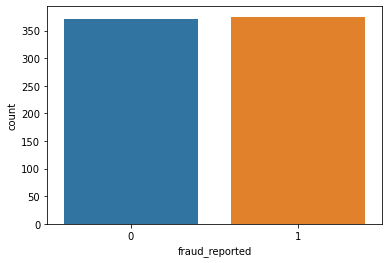

In [90]:
smote_check = pd.DataFrame()
smote_check['fraud_reported'] = y_train

sns.countplot(smote_check['fraud_reported'])

92.8125

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       162
           1       0.94      0.92      0.93       158

    accuracy                           0.93       320
   macro avg       0.93      0.93      0.93       320
weighted avg       0.93      0.93      0.93       320



<AxesSubplot:>

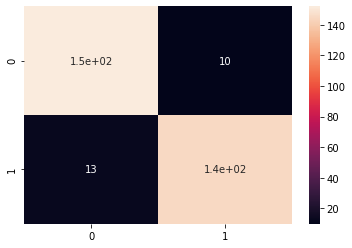

In [91]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X_train, y_train)

preds = rfc.predict(X_test)

score = rfc.score(X_test, y_test)
print(score*100)
print()
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True)

In [110]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 1000, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

{'n_estimators': [300, 650, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 17, 30, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 17, 30, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [300, 650, 1000]},
                   random_state=42, verbose=2)

In [111]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 17,
 'bootstrap': True}

95.0

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       162
           1       0.94      0.96      0.95       158

    accuracy                           0.95       320
   macro avg       0.95      0.95      0.95       320
weighted avg       0.95      0.95      0.95       320



<AxesSubplot:>

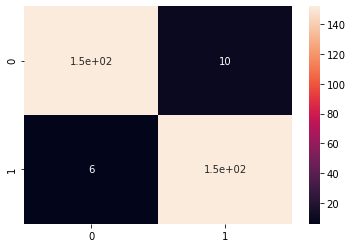

In [112]:
# Elde ettiğimiz best paramsları tekrardan fit edelim ve ardından tahminlemeyi gerçekleştirelim
rf2 = RandomForestClassifier(n_estimators=300,min_samples_split=5,min_samples_leaf=1,max_features='auto'
                            ,max_depth=17,bootstrap='True')
rf2.fit(X_train, y_train)

preds = rf2.predict(X_test)

score = rf2.score(X_test, y_test)
print(score*100)
print()
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True)

* Best paramsları modelime uyguladıntdan sonra 1'leri tahmin etme oranım daha iyi hale geldi. 0'ları aynı derecede tahmin ediyorum.

# Validation dataseti (modelin görmediği) nasıl oluşturulur ve nasıl predict etmeye hazır hale getirilir? 

* Renk ile kategorik bir değişkeniniz olduğunu varsayalım: mavi, yeşil, kırmızı, sarı. LE ile mavi->0, yeşil->1, kırmızı->2, sarı->3 ile değiştirilebilirler. Eğer, splitimiz mavi renk örneği olmayan bir test seti ile sonuçlandığında LE yeşil->0, kırmızı->1, sarı->2'yi atayabilir.

* OHE ile, yukarıdaki senaryoda verilen farklı sayıda özellik etmiş oluruz; tahmin özelliklerinin sayısı eşleşmediğinden büyük olasılıkla bir hata mesajıyla sonuçlanacaktır.

* Train seti için kullandığımız haritalama, validation ve test setlerine eşit olmalıdır.
* Validation ve test setimi gerçek hayattaki verileri yansıtmalı.

In [92]:
df1_val = df1.sort_values(by='incident_date',ascending=False).head(200)
df3 = df1.sort_values(by='incident_date',ascending=False).tail(800)

* tüm data seti incident_date'e göre sıraladık ve ardından validation ve train olarak split ettik. 

In [93]:
cat_cols1 = ['claim_day_of_policy',
 'months_as_customer_groups',
 'capital-loss',
 'policy_annual_premium_groups',
 'AgeGroup',
 'total_claim_amount',
 'capital-gains',
 'incident_date']
for col in cat_cols1:
    df3[col] = df3[col].astype('object')

In [94]:
cat_cols2 = ['claim_day_of_policy',
 'months_as_customer_groups',
 'capital-loss',
 'policy_annual_premium_groups',
 'AgeGroup',
 'total_claim_amount',
 'capital-gains',
 'incident_date']
for col in cat_cols2:
    df1_val[col] = df1_val[col].astype('object')

In [95]:
def train_cats(df3):
    for n,c in df3.items():
        if is_string_dtype(c):
            df3[n] = c.astype("category").cat.as_ordered()

In [96]:
# train sete train_cats uygulandıktan sonra aynı category değişimlerim olsun diye validation a train e bu uygulanır 
def apply_cats(df1_val, df3):
    for n, c in df1_val.items():
        if df3[n].dtype == "category":
            df1_val[n] = pd.Categorical(c, categories = df3[n].cat.categories, ordered = True)

In [97]:
columns_to_encode = []
for col in df3.columns:
    if df3[col].dtype == 'object':
        columns_to_encode.append(col)

columns_to_encode

['policy_state',
 'umbrella_limit',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'total_claim_amount',
 'auto_make',
 'auto_model',
 'claim_day_of_policy',
 'months_as_customer_groups',
 'AgeGroup',
 'policy_bind_Day',
 'policy_annual_premium_groups']

In [98]:
df3 = pd.get_dummies(df1, columns = columns_to_encode)

df3.head()

policy_number  policy_deductable  incident_hour_of_the_day  \
0         521585               1000                         5   
1         342868               2000                         8   
2         687698               2000                         7   
3         227811               2000                         5   
4         367455               1000                        20   

   number_of_vehicles_involved  bodily_injuries  witnesses  auto_year  \
0                            1                1          2       2004   
1                            1                0          0       2007   
2                            3                2          3       2007   
3                            1                1          2       2014   
4                            1                0          1       2009   

   fraud_reported  policy_bind_Month  policy_bind_Year  ...  \
0               1                 10              2014  ...   
1               1                  6              2006  ...   
2               0                  9              2000  ...   
3               1                  5              1990  ...   
4               0                  6              2014  ...   

   policy_bind_Day_Tuesday  policy_bind_Day_Wednesday  \
0                        0                          0   
1                        1                          0   
2                        0                          1   
3                        0                          0   
4                        0                          0   

   policy_annual_premium_groups_1000-1199  \
0                                       0   
1                                       1   
2                                       0   
3                                       0   
4                                       0   

   policy_annual_premium_groups_1200-1399  \
0                                       1   
1                                       0   
2                                       1   
3                                       1   
4                                       0   

   policy_annual_premium_groups_1400-1599  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       1   

   policy_annual_premium_groups_1600-1799  policy_annual_premium_groups_1800+  \
0                                       0                                   0   
1                                       0                                   0   
2                                       0                                   0   
3                                       0                                   0   
4                                       0                                   0   

   policy_annual_premium_groups_400-599  policy_annual_premium_groups_600-799  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     0                                     0   
4                                     0                                     0   

   policy_annual_premium_groups_800-999  
0                                     0  
1                                     0  
2                                     0  
3                                     0  
4                                     0  

[5 rows x 196 columns]

In [99]:
features = []
for col in df3.columns:
    if col != 'fraud_reported':
        features.append(col)

target = 'fraud_reported'

X = df3[features]
y = df3[target]

In [100]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [101]:
oversample = SMOTE(random_state=9)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 42)
X_over, y_over = oversample.fit_resample(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.3, random_state = 1)

In [102]:
columns_to_encode = []
for col in df1_val.columns:
    if df1_val[col].dtype == 'object':
        columns_to_encode.append(col)

columns_to_encode

['policy_state',
 'umbrella_limit',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'total_claim_amount',
 'auto_make',
 'auto_model',
 'claim_day_of_policy',
 'months_as_customer_groups',
 'AgeGroup',
 'policy_bind_Day',
 'policy_annual_premium_groups']

In [103]:
df1_val = pd.get_dummies(df1, columns = columns_to_encode)

df1_val.head()

policy_number  policy_deductable  incident_hour_of_the_day  \
0         521585               1000                         5   
1         342868               2000                         8   
2         687698               2000                         7   
3         227811               2000                         5   
4         367455               1000                        20   

   number_of_vehicles_involved  bodily_injuries  witnesses  auto_year  \
0                            1                1          2       2004   
1                            1                0          0       2007   
2                            3                2          3       2007   
3                            1                1          2       2014   
4                            1                0          1       2009   

   fraud_reported  policy_bind_Month  policy_bind_Year  ...  \
0               1                 10              2014  ...   
1               1                  6              2006  ...   
2               0                  9              2000  ...   
3               1                  5              1990  ...   
4               0                  6              2014  ...   

   policy_bind_Day_Tuesday  policy_bind_Day_Wednesday  \
0                        0                          0   
1                        1                          0   
2                        0                          1   
3                        0                          0   
4                        0                          0   

   policy_annual_premium_groups_1000-1199  \
0                                       0   
1                                       1   
2                                       0   
3                                       0   
4                                       0   

   policy_annual_premium_groups_1200-1399  \
0                                       1   
1                                       0   
2                                       1   
3                                       1   
4                                       0   

   policy_annual_premium_groups_1400-1599  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       1   

   policy_annual_premium_groups_1600-1799  policy_annual_premium_groups_1800+  \
0                                       0                                   0   
1                                       0                                   0   
2                                       0                                   0   
3                                       0                                   0   
4                                       0                                   0   

   policy_annual_premium_groups_400-599  policy_annual_premium_groups_600-799  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     0                                     0   
4                                     0                                     0   

   policy_annual_premium_groups_800-999  
0                                     0  
1                                     0  
2                                     0  
3                                     0  
4                                     0  

[5 rows x 196 columns]

In [104]:
features = []
for col in df1_val.columns:
    if col != 'fraud_reported':
        features.append(col)

target = 'fraud_reported'

X_val = df1_val[features]
y_val = df1_val[target]

In [105]:
X_val

policy_number  policy_deductable  incident_hour_of_the_day  \
0           521585               1000                         5   
1           342868               2000                         8   
2           687698               2000                         7   
3           227811               2000                         5   
4           367455               1000                        20   
..             ...                ...                       ...   
995         941851               1000                        20   
996         186934               1000                        23   
997         918516                500                         4   
998         533940               2000                         2   
999         556080               1000                         6   

     number_of_vehicles_involved  bodily_injuries  witnesses  auto_year  \
0                              1                1          2       2004   
1                              1                0          0       2007   
2                              3                2          3       2007   
3                              1                1          2       2014   
4                              1                0          1       2009   
..                           ...              ...        ...        ...   
995                            1                0          1       2006   
996                            1                2          3       2015   
997                            3                2          3       1996   
998                            1                0          1       1998   
999                            1                0          3       2007   

     policy_bind_Month  policy_bind_Year  policy_state_IL  ...  \
0                   10              2014                0  ...   
1                    6              2006                0  ...   
2                    9              2000                0  ...   
3                    5              1990                1  ...   
4                    6              2014                1  ...   
..                 ...               ...              ...  ...   
995                  7              1991                0  ...   
996                  1              2014                1  ...   
997                  2              2003                0  ...   
998                 11              2011                1  ...   
999                 11              1996                0  ...   

     policy_bind_Day_Tuesday  policy_bind_Day_Wednesday  \
0                          0                          0   
1                          1                          0   
2                          0                          1   
3                          0                          0   
4                          0                          0   
..                       ...                        ...   
995                        1                          0   
996                        0                          0   
997                        0                          0   
998                        0                          0   
999                        0                          0   

     policy_annual_premium_groups_1000-1199  \
0                                         0   
1                                         1   
2                                         0   
3                                         0   
4                                         0   
..                                      ...   
995                                       0   
996                                       0   
997                                       0   
998                                       0   
999                                       0   

     policy_annual_premium_groups_1200-1399  \
0                                         1   
1                                         0   
2                                         1   
3                                         1 

In [106]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_val = sc.fit_transform(X_val)

91.0

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       753
           1       0.87      0.75      0.81       247

    accuracy                           0.91      1000
   macro avg       0.89      0.86      0.87      1000
weighted avg       0.91      0.91      0.91      1000



<AxesSubplot:>

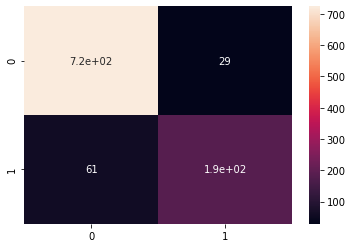

In [107]:
preds = rfc.predict(X_val)

score = rfc.score(X_val, y_val)
print(score*100)
print()
print(classification_report(y_val, preds))

cm = confusion_matrix(y_val, preds)
sns
sns.heatmap(cm, annot=True)

* Validation olarak ayırdığımız gerçek hayat veri setinde modelleme yaptık ve daha öncesinde yüzde 94 olan 0 tahminleme skoru %2 arttı. Gerçek hayat veri setinde 0'ları tahminleme oranının iyi olduğunu gözlemleyebiliyoruz.
* Ancak hedefimiz olan 1'leri tahmin etme oranı %96'dan %75'e kadar düştü. Test veri setimiz overfit yapmış olabilir. 

# predict_proba metoduyla oran nasıl hesaplanır ve treshold nasıl değiştirilir? 

* predict() gerçek sınıfı tahmin etmek için kullanılır (sizin durumunuzda 0, 1 veya 2'den biri)
* predict_proba() sınıf olasılıklarını tahmin etmek için kullanılır
* predict_proba ile treshold değerimizi değitirelim ve modellemesini gerçekleştirip yeni skorumuzu gözlemleyelim.

91.0
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       753
           1       0.82      0.91      0.86       247

    accuracy                           0.93      1000
   macro avg       0.89      0.92      0.91      1000
weighted avg       0.93      0.93      0.93      1000



<AxesSubplot:>

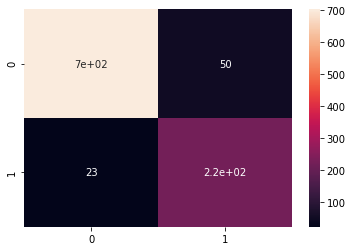

In [108]:
preds = rfc.predict(X_val)
score = rfc.score(X_val, y_val)
print(score*100)


threshold = 0.4

predicted_proba = rfc.predict_proba(X_val)
preds = (predicted_proba[: , 1] >= threshold).astype('int')

print(classification_report(y_val, preds))

cm = confusion_matrix(y_val, preds)
sns
sns.heatmap(cm, annot=True)

* Threshold değerimizi değştirmemizin ardından modelimiz gerçek hayat verilerinde daha iyi sonuçlar verdi:)

# Imbalance datasette train test split yaparken neleri göz önünde bulundurmalıyız? 



* Performans Metriği 

Accuracy, dengesiz bir veri kümesiyle çalışırken kullanılacak ölçü değildir. yanıltıcı olduğunu gördük.
Precision: Bir sınıflandırıcının kesinliğinin bir ölçüsü. 
Recall: Bir sınıflandırıcının eksiksizliğinin bir ölçüsü 
F1 Puanı (veya F-puanı): precision ve recall ağırlıklı ortalaması.

* Yeniden Örnekleme (RESAMPLING)

Tahmine dayalı modelinizi oluşturmak için kullandığınız veri kümesini daha dengeli verilere sahip olacak şekilde değiştirebilirsiniz.
Resampling yaparak, dengesiz veri kümelerini daha dengeli hale getirebiliriz. Oversampling ile yetersiz temsil edilen sınıftan örneklerin kopyalarını ekleyebiliriz veya Undersampling ile aşırı temsil edilen sınıftan örnekleri silebiliriz.

* Sınıf Ağırlıklarını Ayarlamak (ADJUSTING CLASS WEIGHTS)
Eğer elinizde dengesiz bir veri kümesi varsa, “class_weight” parametresi yardımıyla azınlık sınıfına atanan ağırlığı dengesizlik oranında arttırarak, algoritmanın azınlık verisini yanlış sınıflandırmasından kaynaklanan hata oranını arttırabilirsiniz. Dolayısıyla, modeli oluştururken genel hata oranını (overall error rate) azaltmaya çalışan algoritma bu dengesizliği, yani azınlık sınıfı dikkate alacak ve performansı artacaktır.


# Labelencoding'de ilgili kolon için ölçeklendirme nasıl yapılır? (Verinin doğru etkisiyle sayısal olarak dönüştürülmesi) 


* Label Encoding veriyi birebir sayısallaştırmaya yarar. Yani kategorik her veriye sayısal bir değer atar. Bu değerleri aralarında bulunan mantıksal ilişkilere göre atar.Değerler arasında mantıksal bir ilişki bulunmuyorsa değerlerin sonuca etkisi göz önüne alınarak numaralandırma yapılabilir.